In [ ]:
import networkx as nx

# Algoritmos

En esta sesión veremos algunos algoritmos relacionados con gráficas

## Encontrar hojas

Dado un árbol, encuentra sus hojas. (Recuerda que las hojas son aquellos vértices que tienen un único vecino)

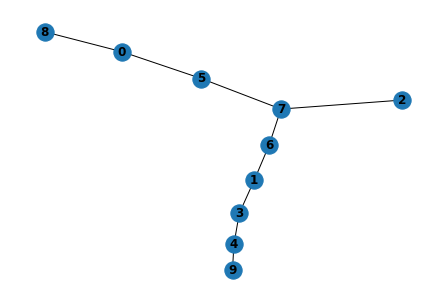

In [ ]:
G = nx.random_tree(10)
nx.draw(G, with_labels=True, font_weight='bold')

In [ ]:
for v in G.nodes: 
    if G.degree[v] == 1:
        print(v)

2
8
9


Como las hojas tienen un único vecino, su grado es $1$, por lo que podemos aprovechar el atributo `degree` de la gráfica.

## Depth-first search 

Este algoritmo nos permite recorrer la gráfica por profundidad, es decir, dado un vértice inicial $v$, explora la gráfica la mayor distancia posible a lo largo de cada rama antes de regresar.

El recorrido de este algoritmo nos da un árbol, comunmente llamado árbol de DFS, que suele ser muy útil.

Escribimos ahora nuestro algoritmo; lo definimos de manera recursiva:

In [ ]:
def dfs(g, v, visited=None):
    if visited is None:
        visited = [False] * len(g.nodes)
        
    visited[v] = True
    print(v) # Aquí puede ir cualquier otra cosa
    for u in g.adj[v]:
        if not visited[u]:
            dfs(g, u, visited)

Generamos una gráfica aleatoria para probarlo:

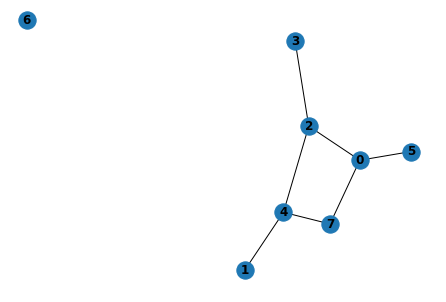

In [ ]:
G = nx.gnp_random_graph(8, 1/3)
nx.draw(G, with_labels=True, font_weight='bold')

In [ ]:
dfs(G, 6)

6


### Altura de un árbol

Encontremos la altura de un árbol usando DFS; el procedimiento es bastante sencillo: todo lo que tenemos que hacer es calcular la altura de cada uno de los vértices, guardando el valor más alto encontrado en cada iteración.

In [ ]:
def tree_height(g, v, h=None, m=None):
    if h is None:
        h = [-1] * len(g.nodes)
        h[v] = 0
        
    if m is None:
        m = [0]
        
    for u in g.adj[v]:
        if h[u] == -1:
            h[u] = h[v] + 1
            if m[0] < h[u]:
                m[0] = h[u]
            tree_height(g, u, h, m)
    return m[0], h

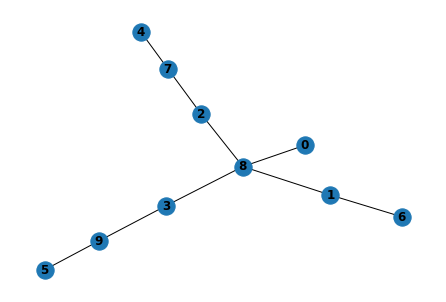

In [ ]:
T = nx.random_tree(10)
nx.draw(T, with_labels=True, font_weight='bold')

In [ ]:
m, h = tree_height(T, 0)
print(m)
print(h)

4
[0, 2, 2, 2, 4, 4, 3, 3, 1, 3]


### Coloreado

El colorear una gráfica consiste en asignar un color a cada nodo, de modo que cada par de nodos adyacentes tengan colores distintos. En 1976, se probó que para cualquier gráfica planar (i.e., que las aristas no se cruzan) se necesitan a lo mucho [cuatro colores](https://en.wikipedia.org/wiki/Four_color_theorem), aunque el algoritmo que implementaremos usa más colores que este óptimo.

El procedimiento es bastante sencillo: recorremos la gráfica utilizando DFS. Si un nodo no está coloreado, significa que no lo hemos visitado, así que lo visitamos y lo coloreamos con el primer color que no tengan sus vecinos. Repetimos esto hasta que todos los nodos estén coloreados.

In [ ]:
def first_available_color(neighbor_colors):
    out = 0
    while True:
        if out not in neighbor_colors:
            return out
        out += 1


def graph_coloring(g, v, visited=None):
    if visited is None:
        visited = [-1] * len(g.nodes)
    
    neighbor_colors = set([visited[n] for n in g.adj[v]])
    visited[v] = first_available_color(neighbor_colors)
    
    for u in g.adj[v]:
        if visited[u] == -1:
            graph_coloring(g, u, visited)
    return visited

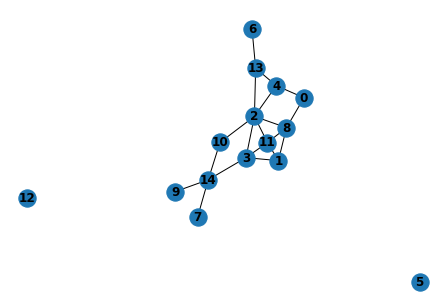

In [ ]:
G = nx.gnp_random_graph(15, 1/5)
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, font_weight='bold', pos=pos)

In [ ]:
node_colors = graph_coloring(G, 0)
node_colors

[0, 0, 0, 1, 1, -1, 0, 1, 1, 1, 1, 2, -1, 2, 0]

In [ ]:
color_names = ['red', 'green', 'blue', 'orange']
color_map = [None] * len(node_colors)
for i, c in enumerate(node_colors):
    color_map[i] = color_names[c]
color_map

['red',
 'red',
 'red',
 'green',
 'green',
 'orange',
 'red',
 'green',
 'green',
 'green',
 'green',
 'blue',
 'orange',
 'blue',
 'red']

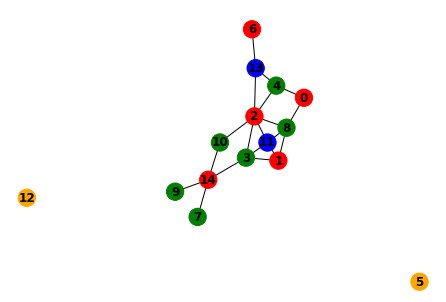

In [ ]:
nx.draw(G, with_labels=True, font_weight='bold', node_color=color_map, pos=pos)

## Breadth-first search

Este algoritmos nos permite, a partir de cierto vértice recorrer la gráfica por anchura, es decir, irnos expandiendo a partir de un vértices inicial $v$, primero se visitan los vértices vecinos a $v$, después los vecinos de sus vecinos, y así sucesivamente. 

Esto en particular nos permite conocer la distancia del vértice $v$ a cualquier otro vértice de la gráfica, lo cual no es posible con DFS. Además, el recorrido que se hace con este algoritmo nos da un árbol generador de la componente conexa en la que se encuentra el vértice de donde partimos.

Escribiremos un código por nuestra cuenta, por momento sin hacer uso de algoritmos de la librería NetworkX. Para esto, necesitaremos usar una estructura, una cola, cuya cualidad es que el primer objeto en ser insertado es el primero en ser eliminado.

In [ ]:
from collections import deque

def bfs(g, v):
    visited = [False] * len(g.nodes)
    q = deque()
    visited[v] = True
    q.append(v)
    
    while(q):
        u = q.popleft()
        print(u) # Pueden hacer lo que quieran
        for w in g.adj[u]:
            if not visited[w]:
                visited[w] = True
                q.append(w)

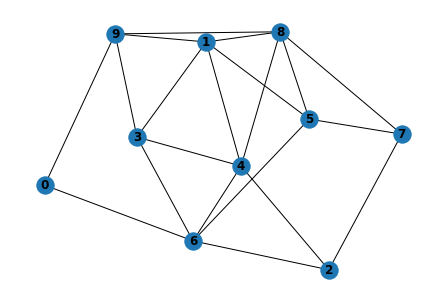

In [ ]:
G = nx.gnp_random_graph(10, 1/3)
nx.draw(G, with_labels=True, font_weight='bold')

In [ ]:
bfs(G, 0)

0
6
9
2
3
4
5
1
8
7


Dado que cada vértice y cada arista se recorre a lo más una vez en este algoritmo, podemos concluir que su complejidad es $O(n + m)$, donde $n$ es la cantidad de vértices y $m$ de aristas.

# Ejercicios

Para los siguientes ejercicios, crea primero una gráfica de forma aleatoria, donde uses la probabilidad que desees sobre las aristas.

## Ejercicio 1
Determina cuántas componentes conexas tiene la gráfica.

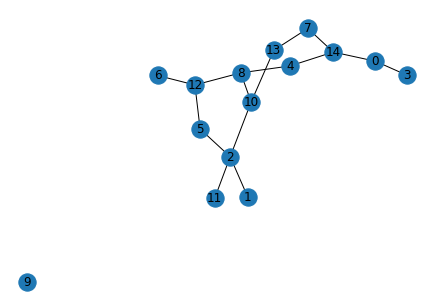

In [ ]:
#Como queremos  que haya componenetes convexas queremos que la prbabilidad de que los vertices se unan con otros sea baja

GE1=nx.gnp_random_graph(15,1/5)
nx.draw(GE1,with_labels=True)


In [ ]:
def conexa(g):
  cuenta=0
  visitados =[False] * len(g.nodes) 
  for v in range(len(g)):
    if (visitados[v]== False):
      dfs(g,v,visitados)
      cuenta +=1
  return   print("La cantidad de componentes conexas de esta gráfica es:",cuenta)
conexa(GE1)

0
3
14
4
8
10
2
1
5
12
6
11
13
7
9
La cantidad de componentes conexas de esta gráfica es: 2


## Ejercicio 2

Escribe un código que permita encontrar la distancia del vértice entre cualquier par de vértices de la gráfica (regresa -1 si no pertenecen a la misma componente conexa)

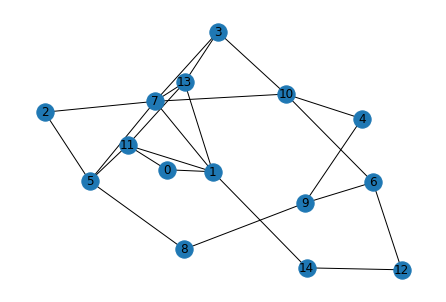

In [ ]:
GE2=nx.gnp_random_graph(15,1/5)
nx.draw(GE2,with_labels=True)


In [ ]:
# no se si queria que usramos el BFS pero pues así queda mucho más sencillo y bonito :)
def camino(g,u,v):
  if u not in  nx.node_connected_component(g,v):
    return -1
  else :
    return nx.shortest_path_length(g,u,v)
camino(GE2,14,7)

2